# Physical attacks - Detection

## I - Modules

In [10]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score,recall_score,ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np


## II - Charger donnée

Utilisons donnée préparée :

In [11]:
df_normal = pd.read_csv("preparation/physical_normal.csv")
df_attack_1 = pd.read_csv("preparation/physical_1.csv")
df_attack_2 = pd.read_csv("preparation/physical_2.csv")
df_attack_3 = pd.read_csv("preparation/physical_3.csv")
df_attack_4 = pd.read_csv("preparation/physical_4.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'preparation/physical_normal.csv'

In [12]:
df_normal.head()

,Unnamed: 0,Tank_1,Tank_2,Tank_3,Tank_4,Tank_5,Tank_6,Tank_7,Tank_8,Pump_1,...,Valv_14,Valv_15,Valv_16,Valv_17,Valv_18,Valv_19,Valv_20,Valv_21,Valv_22,Label
0,0,0,0,0,0,0,0,0,0,False,...,False,False,False,False,False,False,False,False,False,normal
1,1,0,0,0,0,0,0,0,0,False,...,False,False,False,False,False,False,False,False,False,normal
2,2,0,0,0,0,0,0,0,0,False,...,False,False,False,False,False,False,False,False,False,normal
3,3,0,0,0,0,0,0,0,0,False,...,False,False,False,False,False,False,False,False,False,normal
4,4,0,0,0,0,0,0,0,0,False,...,False,False,False,False,False,False,False,False,False,normal


In [13]:
df_attack_1.head()

,Unnamed: 0,Tank_1,Tank_2,Tank_3,Tank_4,Tank_5,Tank_6,Tank_7,Tank_8,Pump_1,...,Valv_14,Valv_15,Valv_16,Valv_17,Valv_18,Valv_19,Valv_20,Valv_21,Valv_22,Label
0,0,0,0,0,0,0,0,0,0,False,...,False,False,False,False,False,False,False,False,False,normal
1,1,0,0,0,0,0,0,0,0,False,...,False,False,False,False,False,False,False,False,False,normal
2,2,0,0,0,0,0,0,0,0,False,...,False,False,False,False,False,False,False,False,False,normal
3,3,0,0,0,0,0,0,0,0,False,...,False,False,False,False,False,False,False,False,False,normal
4,4,0,0,0,0,0,0,0,0,True,...,False,False,False,False,False,False,False,False,False,normal


## III - Fonctions

### 1 - Matrice de confusion

In [24]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds,normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))

    labels_for_fig = [l[0:4]+'.' for l in labels]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=labels_for_fig)
    try:
        disp.plot(cmap="Blues", values_format="4f", ax=ax, colorbar=False)
    except:
        print(pd.unique(y_preds))
        print(pd.unique(y_true))
        print(labels)
    plt.title("Normalized confusion matrix")
    plt.show()

### 2 - KNN

In [25]:
def KNN_attack_detection(df):
    new_df = df.copy()
    print("taille",len(df))
    X = new_df.drop('Label', axis=1)  # Caractéristiques
    y = new_df['Label']  # Cible
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    k = len(pd.unique(y_test))
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)


    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(list(y_pred), list(y_test))
    recall = recall_score(list(y_pred), list(y_test), average='macro')
    print("Précision du modèle KNN : {:.2f}%".format(accuracy * 100))
    plot_confusion_matrix(list(y_pred),list(y_test),knn_model.classes_)

### 3 - Random Forest

In [26]:

def randomForest_attack_detector(df):
    # Train the model on training data
    new_df = df.copy()
    n=0
    labels = pd.unique(new_df["Label"])
    for label in pd.unique(new_df["Label"]):
        new_df["Label"]=new_df['Label'].replace(label, n)
        n+=1
    X = new_df.drop('Label', axis=1)  # Caractéristiques
    y = new_df['Label']  # Cible
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    
    rf = RandomForestRegressor(n_estimators = 20, random_state = 42)
    rf.fit(X_train, y_train)

    print(pd.unique(y_test))

    y_pred = np.round(rf.predict(X_test))
    accuracy = accuracy_score(list(y_pred), list(y_test))
    print("Accuracy du modèle KNN : {:.2f}%".format(accuracy * 100))
    plot_confusion_matrix(list(y_pred),list(y_test),labels)

## IV - Detection

taille 2420
Précision du modèle KNN : 99.59%


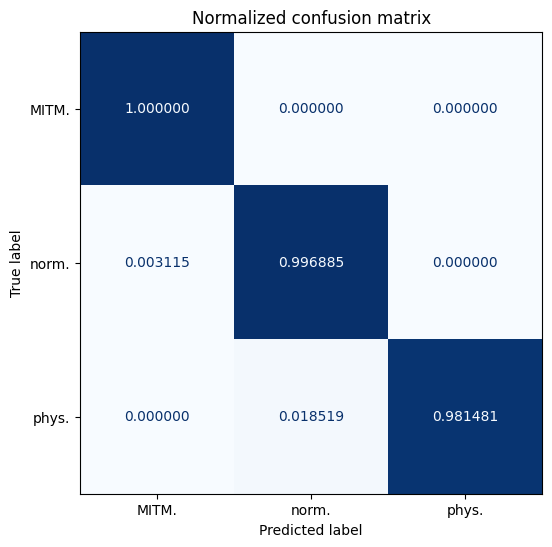

In [27]:
KNN_attack_detection(df_attack_1)

taille 2104
Précision du modèle KNN : 98.81%


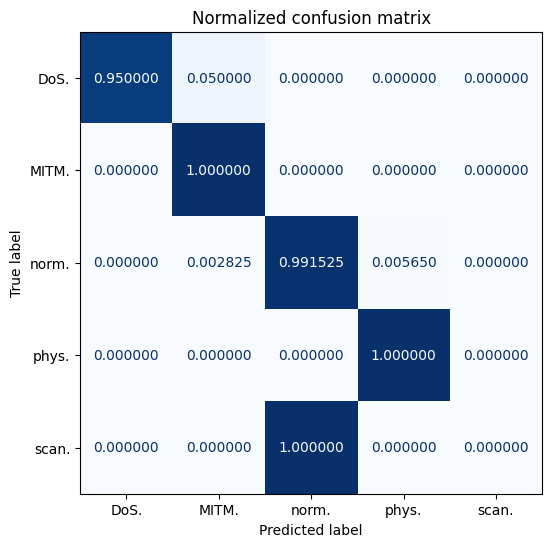

In [28]:
KNN_attack_detection(df_attack_2)

taille 1254
Précision du modèle KNN : 99.20%


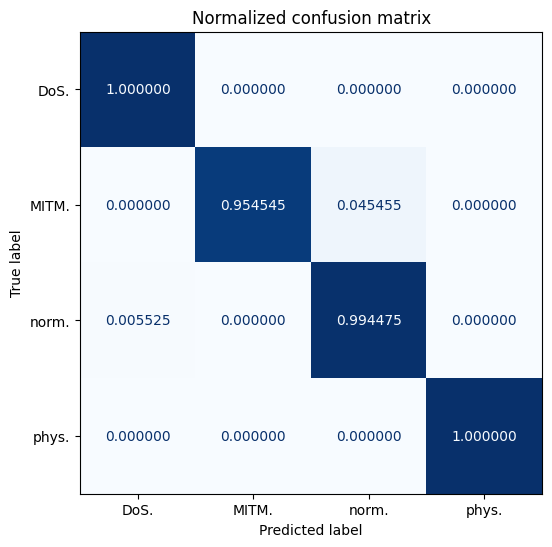

In [29]:
KNN_attack_detection(df_attack_3)

taille 1717
Précision du modèle KNN : 98.55%


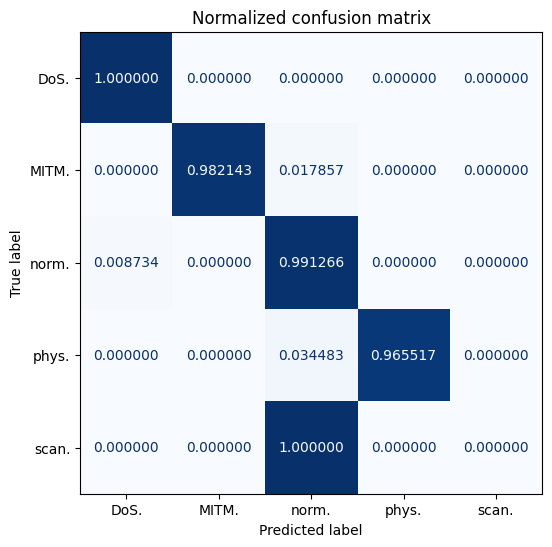

In [30]:
KNN_attack_detection(df_attack_4)

taille 7495
Précision du modèle KNN : 96.93%


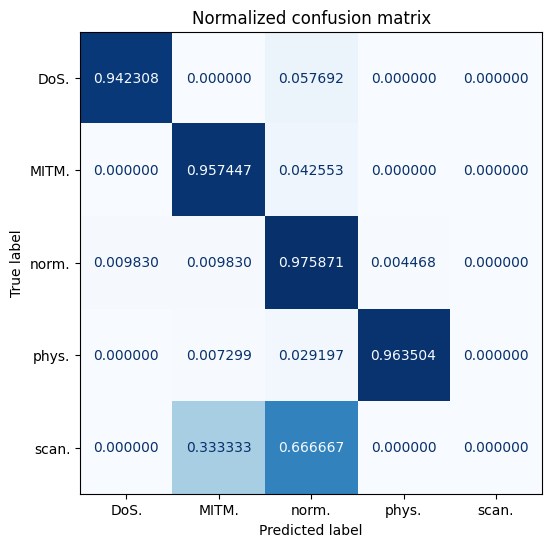

In [31]:
KNN_attack_detection(pd.concat([df_attack_1,df_attack_2,df_attack_3,df_attack_4]))

taille 10923
Précision du modèle KNN : 98.54%


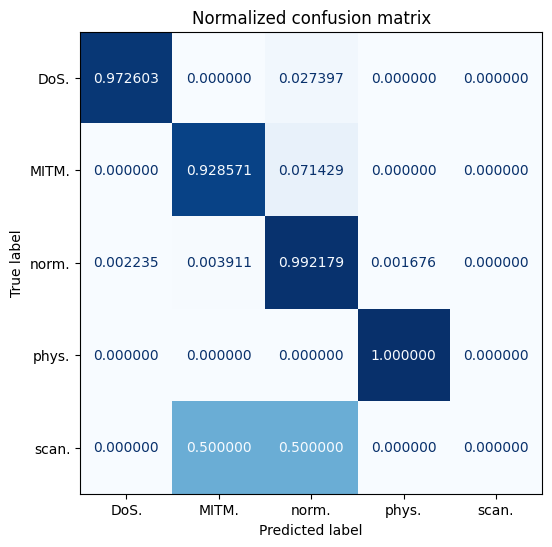

In [32]:
KNN_attack_detection(pd.concat([df_normal,df_attack_1,df_attack_2,df_attack_3,df_attack_4]))

### 3 - Random Forest

[1 0 2]
Accuracy du modèle KNN : 99.17%


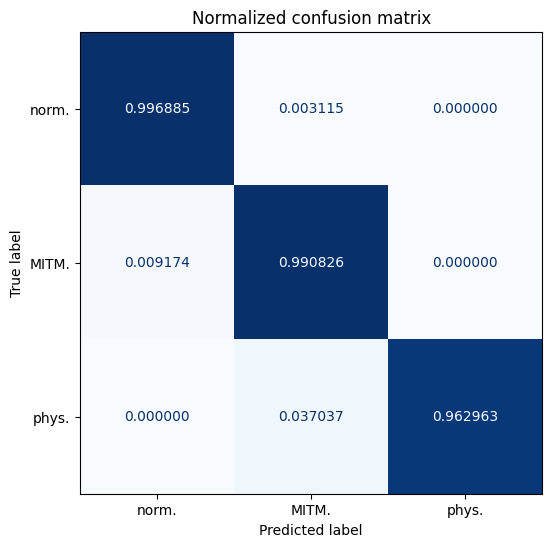

In [33]:
randomForest_attack_detector(df_attack_1)

[0 4 1 2 3]
Accuracy du modèle KNN : 97.80%


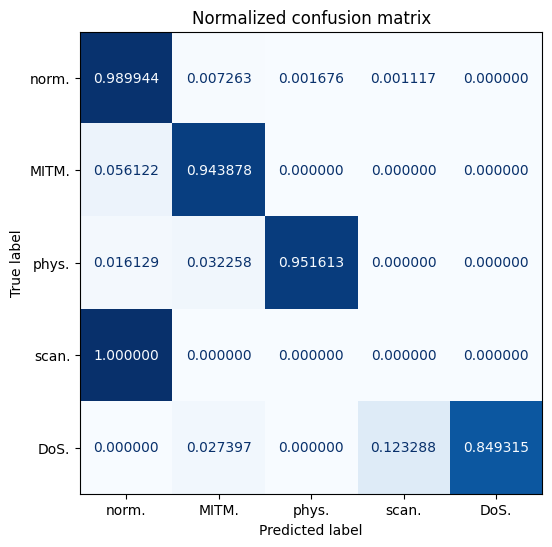

In [34]:
randomForest_attack_detector(pd.concat([df_normal,df_attack_1,df_attack_2,df_attack_3,df_attack_4]))

In [15]:
np.round([5.8,7,2.2])

array([6., 7., 2.])